# Proyecto: Análisis de mercado inmobiliario

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos que servirán para poder predecir los precios de venta son las características técnicas o estructurales de cada propiedad, como por ejemplo:
* Tamaño de la propiedad: mientras mayor sean los metros cuadrados de la propiedad, mayor será el precio de venta.
* Número de habitaciones: mientras mas habitaciones tenga la propiedad, el precio probablemente será mayor.
* Número de baños: mientras mas baños tenga la propiedad, el precio será mayor.
* Tipo de material con el que fue contruido: materiales más sólidos conllevan un mayor costo de la propiedad.
* Ubicación de la propiedad: un buen sector significará un mayor precio de la propiedad, tal como un mal sector implicará un menor precio de la misma.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Importar el dataset
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
df.shape

(146660, 19)

Podemos observar que el dataset contiene `146660` instancias y `19` columnas

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
# Cantidad de tipos de propiedades distintas
df.property_type.nunique()

10

In [6]:
# Tipos de propiedades
df.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
# Cantidad de propiedades por cada tipo
df["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

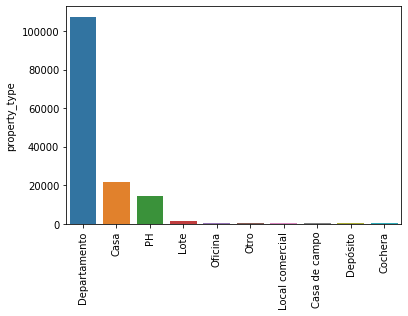

In [8]:
import seaborn as sns
barras = sns.barplot(x=df["property_type"].value_counts().index, y=df["property_type"].value_counts())
barras.set_xticklabels(labels=df["property_type"].value_counts().index,rotation=90);

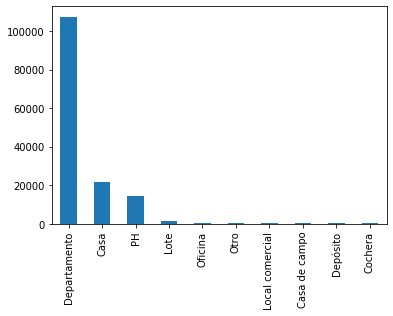

In [9]:
import matplotlib.pyplot as plt

df["property_type"].value_counts().plot(kind="bar");

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

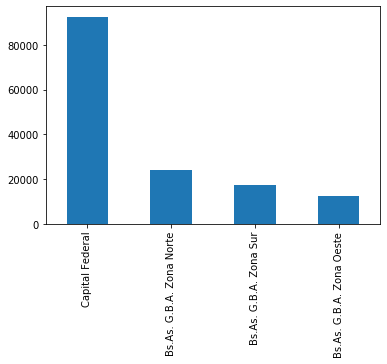

In [10]:
df["l2"].value_counts().plot(kind="bar");

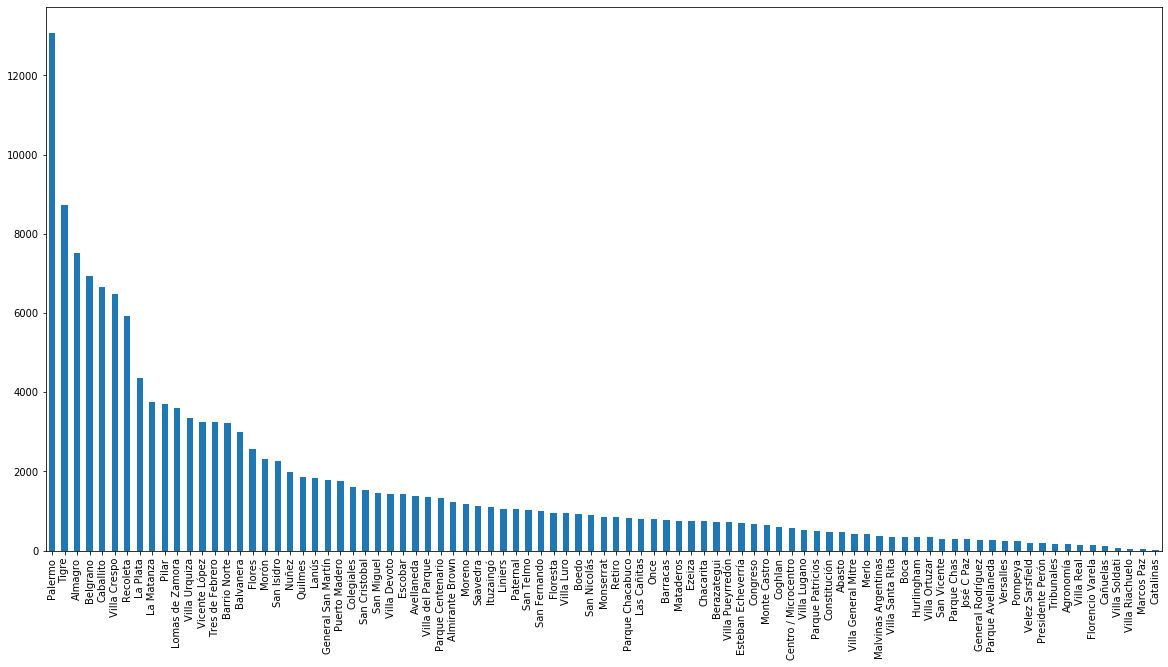

In [11]:
df["l3"].value_counts().plot(kind="bar", figsize=(20,10));

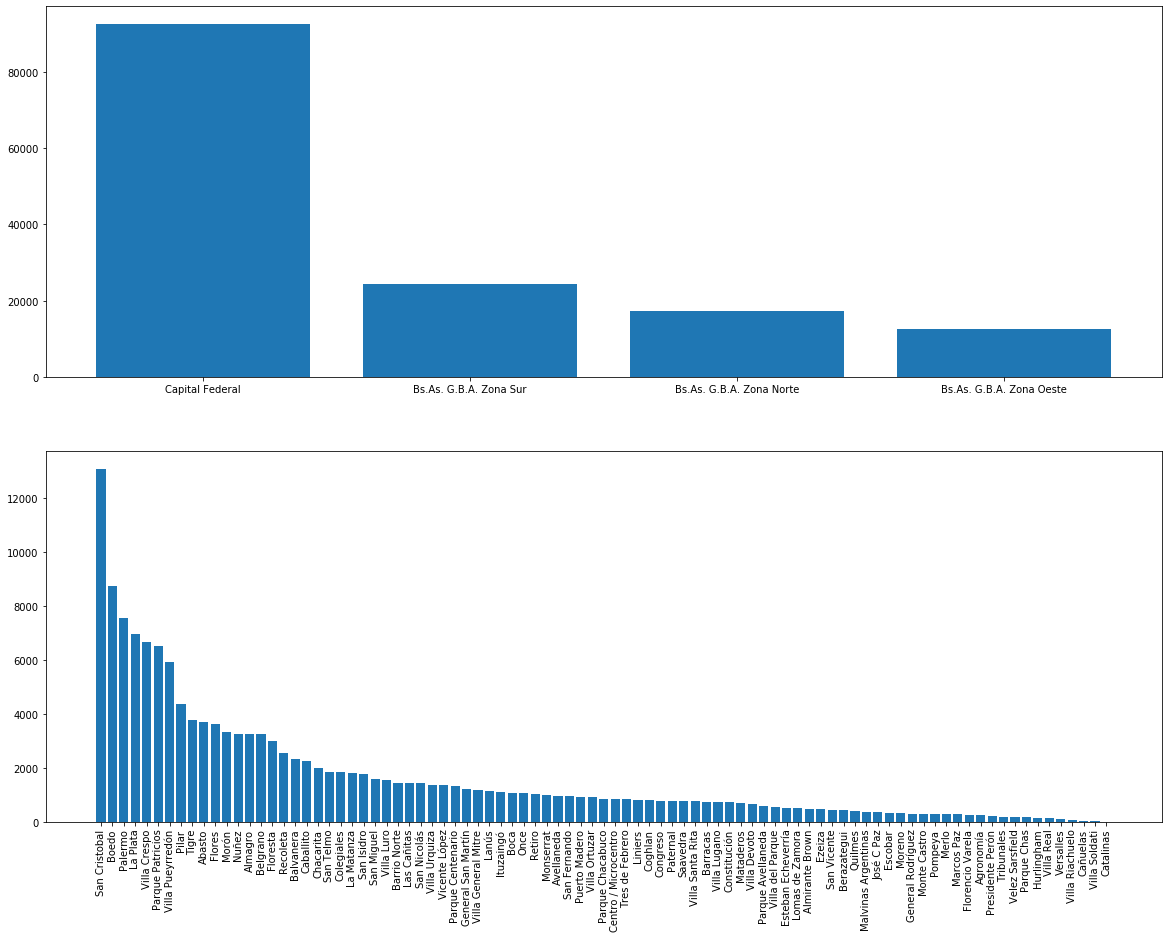

In [12]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(20,15))
ax1.bar(df["l2"].unique(),df["l2"].value_counts())
ax2.bar(df["l3"].unique(),df["l3"].value_counts())
ax2.set_xticklabels(df["l3"].unique(), rotation=90);

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
# df2 contiene todas las propiedades que se encuentran en Capital Federal (región con más propiedades publicadas)
df2 = df[df["l2"] == "Capital Federal"]
df2.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [14]:
df2["property_type"].value_counts()

Departamento       79029
PH                  9764
Casa                2692
Oficina              458
Lote                 243
Otro                 114
Cochera              106
Local comercial      102
Depósito              30
Casa de campo          1
Name: property_type, dtype: int64

In [15]:
# Se descartan todas las propiedades que no sean Departamentos, PH's o Casas
df2=df2.drop(df2[(df2["property_type"] != "Departamento") & (df2["property_type"] != "PH") & (df2["property_type"] != "Casa")].index)
df2

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [16]:
df2.shape

(91485, 19)

In [17]:
df2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

### Departamentos

En esta sección analizaremos los datos correspondientes a Departamentos

In [18]:
# Creamos un nuevo dataset y desechamos las columnas que no aportan información relevante
df_dep = df2.drop(["start_date","end_date","created_on","lat",
                   "lon","l1","l2","l3","currency","title",
                   "description","operation_type"], axis=1)
df_dep = df_dep[df_dep.property_type == "Departamento"]
df_dep

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [19]:
# Se eliminan las instancias con datos faltantes.
df_dep = df_dep.dropna(axis=0)
df_dep

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


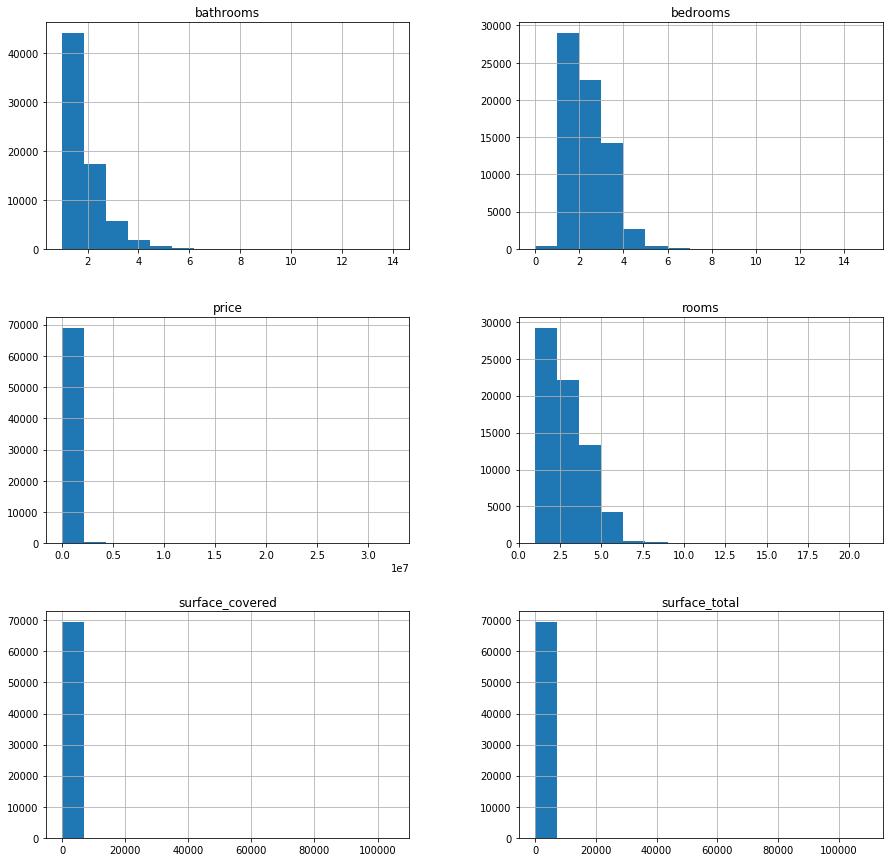

In [20]:
# Histogramas.
df_dep.hist(bins=15,figsize=(15,15));

In [21]:
# Datos estadísticos.
df_dep.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,69470.000000,69470.000000,69470.000000,69470.000000,69470.000000,6.947000e+04
mean,2.861379,1.881229,1.529322,98.913502,86.248208,2.681076e+05
std,1.196527,0.944874,0.841357,662.843853,499.348268,3.534089e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,47.000000,43.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,67.000000,60.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,99.000000,88.000000,2.750000e+05
max,21.000000,15.000000,14.000000,108960.000000,104890.000000,3.243423e+07


Viendo la información anterior, se puede apreciar que existen variales con valores extraños. Tenemos casos donde la superficie total es pequeña (10 metros cuadrados) y la superficie cubierta aún más pequeña (1 metro cuadrado para el valor mínimo). Estos suponen casos excepcionales. 

### surface_total (Departamentos)

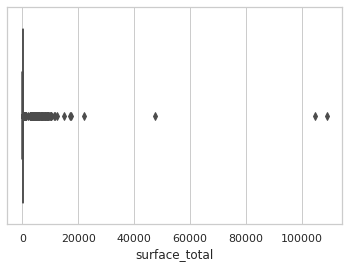

In [22]:
sns.set(style="whitegrid")
surface = sns.boxplot(x=df_dep["surface_total"])

Existe mucha diferencia entre los valores más grandes y el resto de datos.
Consideremos los valores de superficie mayores a 10 y menores a 1000

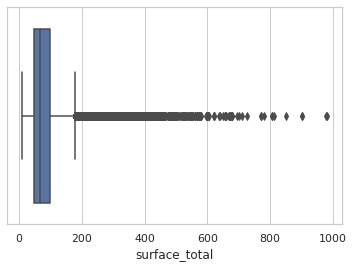

In [23]:
surface = sns.boxplot(df_dep[(df_dep["surface_total"] > 10) & (df_dep["surface_total"] <= 1000)].surface_total)

Consideremos los valores de superficie mayores a 15 y menores a 1000

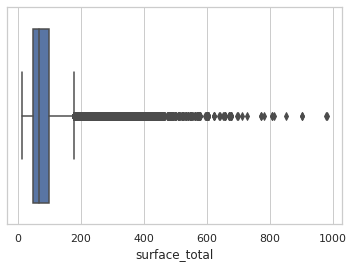

In [24]:
surface = sns.boxplot(df_dep[(df_dep["surface_total"] >= 15) & (df_dep["surface_total"] <= 1000)].surface_total)

### `surface_covered` vs `surface_total`  (Departamentos)
Las propiedades no pueden tener surface_covered mayor a surface_total

In [25]:
df_dep[df_dep["surface_covered"] > df_dep["surface_total"]]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
859,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento
924,3.0,2.0,1.0,65.0,66.0,187000.0,Departamento
1329,2.0,1.0,2.0,44.0,45.0,235000.0,Departamento
1438,3.0,2.0,1.0,78.0,79.0,235000.0,Departamento
1547,4.0,3.0,2.0,145.0,13402.0,510000.0,Departamento
...,...,...,...,...,...,...,...
132454,3.0,2.0,1.0,63.0,64.0,105000.0,Departamento
134924,3.0,2.0,2.0,75.0,76.0,110000.0,Departamento
145138,1.0,1.0,1.0,24.0,25.0,54900.0,Departamento
145146,1.0,1.0,1.0,21.0,22.0,48000.0,Departamento


Existen `529` instancias donde la superficie cubierta es mayor a la superficie total. Hay que remover dichas instancias.

### Precio

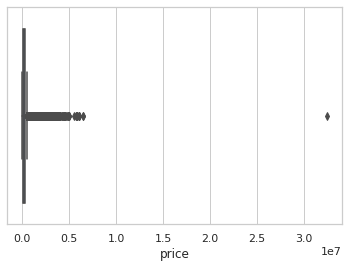

In [26]:
precio_dep_boxplot = sns.boxplot(x=df_dep["price"])

Tenemos datos que se escapan demasiado del conjunto. Consideremos las instancias con precios igual o menor a 4000000

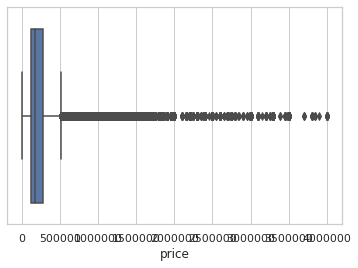

In [27]:
precio__dep_boxplot = sns.boxplot(df_dep[df_dep["price"] <= 4000000].price)

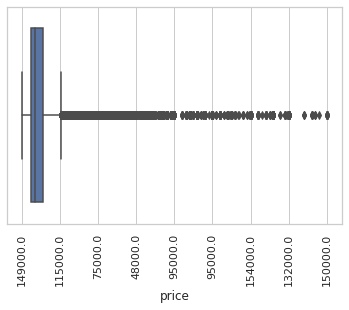

In [28]:
# Ajuste de las etiquetas del eje x
precio_dep_boxplot = sns.boxplot(df_dep[df_dep["price"] <= 4000000].price)
precio_dep_boxplot.set_xticklabels(labels=df_dep[df_dep["price"] <= 4000000].price, rotation=90);

### Filtrado del Dataset

In [29]:
# Se consideran aquellas instancias con superficie total entre 15 y 1000 metros cuadrados
df_dep = df_dep[(df_dep["surface_total"] >= 15) & (df_dep["surface_total"] <= 1000)]
df_dep

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [30]:
# Se descartan aquellas instancias con una superficie total menor a la superficie cubierta
df_dep = df_dep[df_dep["surface_total"] >= df_dep["surface_covered"]]
df_dep

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [31]:
# Se consideran los departamentos con precio menor o igual a 4000000 dólares.
df_dep = df_dep[df_dep["price"] <= 4000000]
df_dep

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


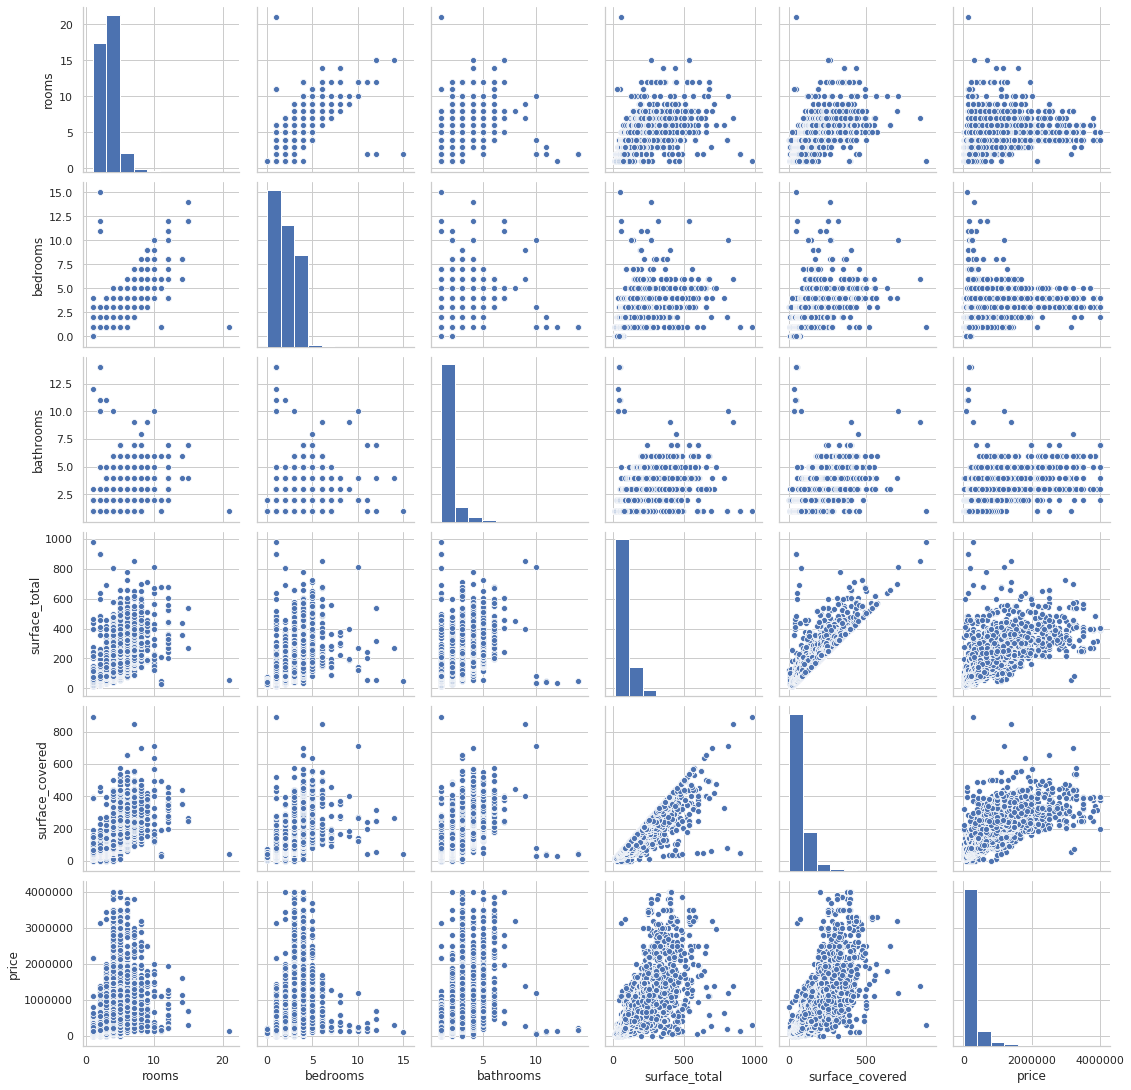

In [32]:
g = sns.pairplot(df_dep)

### PH 

En esta sección analizaremos los datos correspondientes a PH's

In [33]:
# Creamos un nuevo dataset y desechamos las columnas que no aportan información relevante
df_ph = df2.drop(["start_date","end_date","created_on","lat",
                   "lon","l1","l2","l3","currency","title",
                   "description","operation_type"], axis=1)
df_ph = df_ph[df_ph.property_type == "PH"]
df_ph

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...
146549,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH


In [34]:
# Se eliminan las intancias con datos faltantes.
df_ph = df_ph.dropna(axis=0)
df_ph

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...
146549,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH


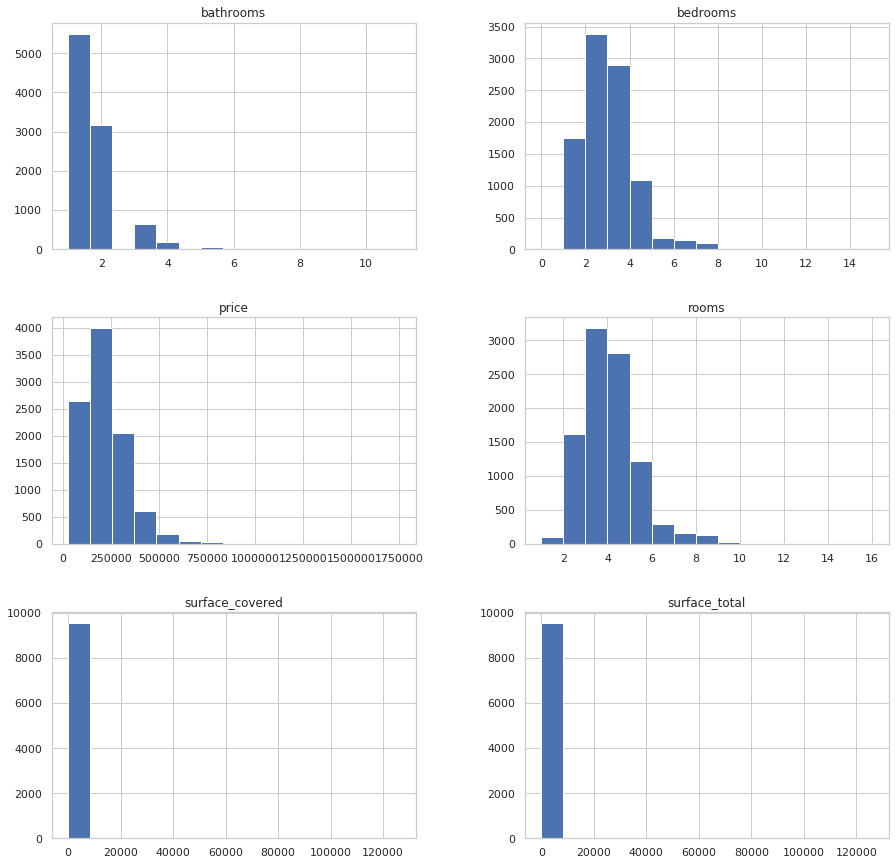

In [35]:
# Histogramas
df_ph.hist(bins=15,figsize=(15,15));

In [36]:
# Datos estadísticos
df_ph.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,9582.000000,9582.000000,9582.000000,9582.000000,9582.000000,9.582000e+03
mean,3.638280,2.539971,1.560008,177.043519,131.060426,2.195324e+05
std,1.382124,1.240860,0.789306,2248.519245,1829.394403,1.160415e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,2.700000e+04
25%,3.000000,2.000000,1.000000,70.000000,58.000000,1.370000e+05
50%,3.000000,2.000000,1.000000,105.000000,84.000000,1.950000e+05
75%,4.000000,3.000000,2.000000,152.000000,123.000000,2.715000e+05
max,16.000000,15.000000,11.000000,126062.000000,126062.000000,1.750000e+06


Nuevamente nos encontramos con valores extraños relativos a las variables de superficie total y superficie cubierta

### surface_total (PH)

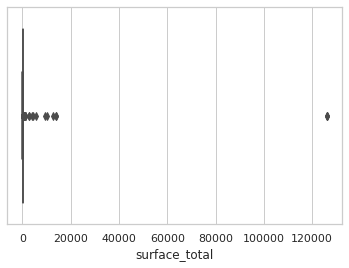

In [37]:
surface = sns.boxplot(x=df_ph["surface_total"])

Existe mucha diferencia entre los valores más grandes y el resto de datos.
Consideremos los valores de superficie mayores a 15 y menores a 1000

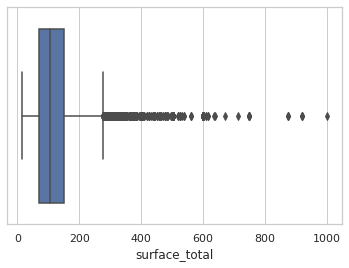

In [38]:
surface = sns.boxplot(df_ph[(df_ph["surface_total"] >= 15) & (df_ph["surface_total"] <= 1000)].surface_total)

### `surface_covered` vs `surface_total` (PH)
Las propiedades no pueden tener surface_covered mayor a surface_total

In [39]:
df_ph[df_ph["surface_covered"] > df_ph["surface_total"]]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
5082,5.0,2.0,2.0,150.0,9626.0,205000.0,PH
6204,5.0,4.0,2.0,94.0,121.0,289000.0,PH
8409,4.0,3.0,2.0,100.0,105.0,235000.0,PH
9087,6.0,5.0,1.0,42.0,198.0,220000.0,PH
9938,2.0,1.0,1.0,31.0,35.0,58000.0,PH
17529,2.0,1.0,2.0,65.0,75.0,125000.0,PH
31230,3.0,2.0,2.0,28.0,95.0,219000.0,PH
31247,3.0,2.0,1.0,63.0,5621.0,75000.0,PH
32226,3.0,2.0,1.0,82.0,100.0,160000.0,PH
33408,5.0,4.0,1.0,68.0,101.0,250000.0,PH


In [40]:
len(df_ph[df_ph["surface_covered"] > df_ph["surface_total"]])

40

Existen `40` instancias donde la superficie cubierta es mayor a la superficie total. Hay que remover dichas instancias.

### Precio

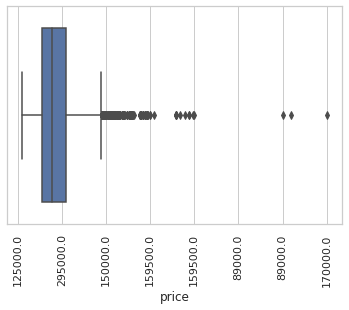

In [41]:
precio_ph_boxplot = sns.boxplot(x=df_ph["price"])
precio_ph_boxplot.set_xticklabels(labels=df_ph["price"], rotation=90);

In [42]:
len(df_ph[df_ph["price"] > 4000000])

0

En esta oportunidad no tenemos valores de precios superiores a los 4000000 dólares

### Filtrado del Dataset

In [43]:
# Se consideran aquellas instancias con superficie total entre 15 y 1000 metros cuadrados
df_ph = df_ph[(df_ph["surface_total"] >= 15) & (df_ph["surface_total"] <= 1000)]
df_ph

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...
146549,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH


In [44]:
# Se descartan aquellas instancias con una superficie total menor a la superficie cubierta
df_ph = df_ph[df_ph["surface_total"] >= df_ph["surface_covered"]]
df_ph

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...
146549,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH


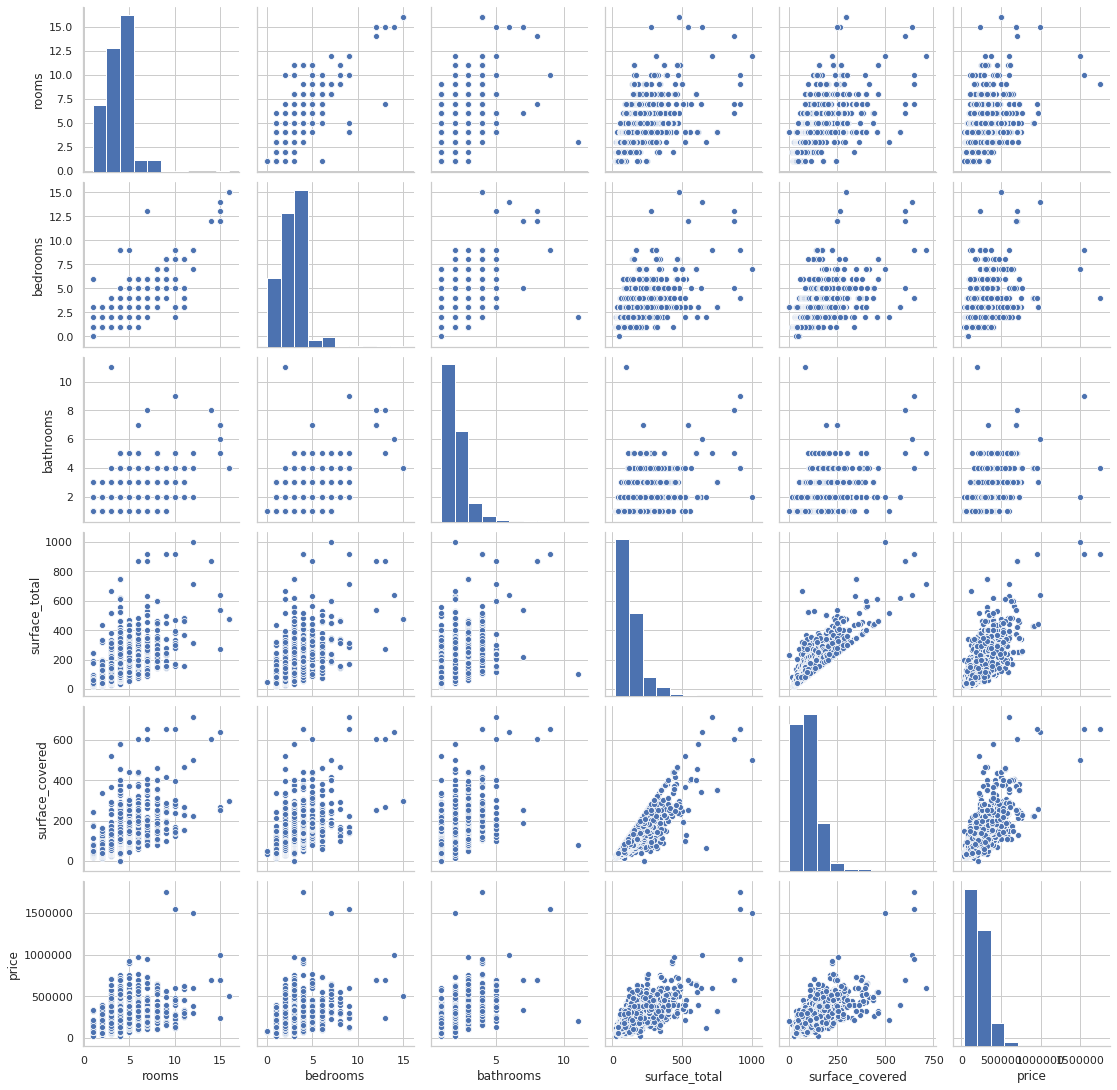

In [45]:
g = sns.pairplot(df_ph)

### Casas
En esta sección analizaremos los datos correspondientes a Casas

In [46]:
# Creamos un nuevo dataset y desechamos las columnas que no aportan información relevante
df_casa = df2.drop(["start_date","end_date","created_on","lat",
                   "lon","l1","l2","l3","currency","title",
                   "description","operation_type"], axis=1)
df_casa = df_casa[df_casa.property_type == "Casa"]
df_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
336,3.0,1.0,2.0,116.0,116.0,290000.0,Casa
384,3.0,2.0,1.0,171.0,120.0,179900.0,Casa
385,3.0,2.0,1.0,71.0,68.0,174000.0,Casa
446,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
454,6.0,5.0,1.0,210.0,189.0,225000.0,Casa
...,...,...,...,...,...,...,...
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa
145608,6.0,4.0,3.0,NaN,250.0,550000.0,Casa
145609,5.0,4.0,4.0,NaN,NaN,1100000.0,Casa
145610,4.0,4.0,1.0,162.0,NaN,395000.0,Casa


In [47]:
# Se eliminan las instancias con datos faltantes.
df_casa = df_casa.dropna(axis=0)
df_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
336,3.0,1.0,2.0,116.0,116.0,290000.0,Casa
384,3.0,2.0,1.0,171.0,120.0,179900.0,Casa
385,3.0,2.0,1.0,71.0,68.0,174000.0,Casa
446,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
454,6.0,5.0,1.0,210.0,189.0,225000.0,Casa
...,...,...,...,...,...,...,...
145547,5.0,3.0,3.0,190.0,155.0,259500.0,Casa
145548,4.0,3.0,3.0,138.0,100.0,310000.0,Casa
145556,3.0,3.0,2.0,160.0,86.0,220000.0,Casa
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa


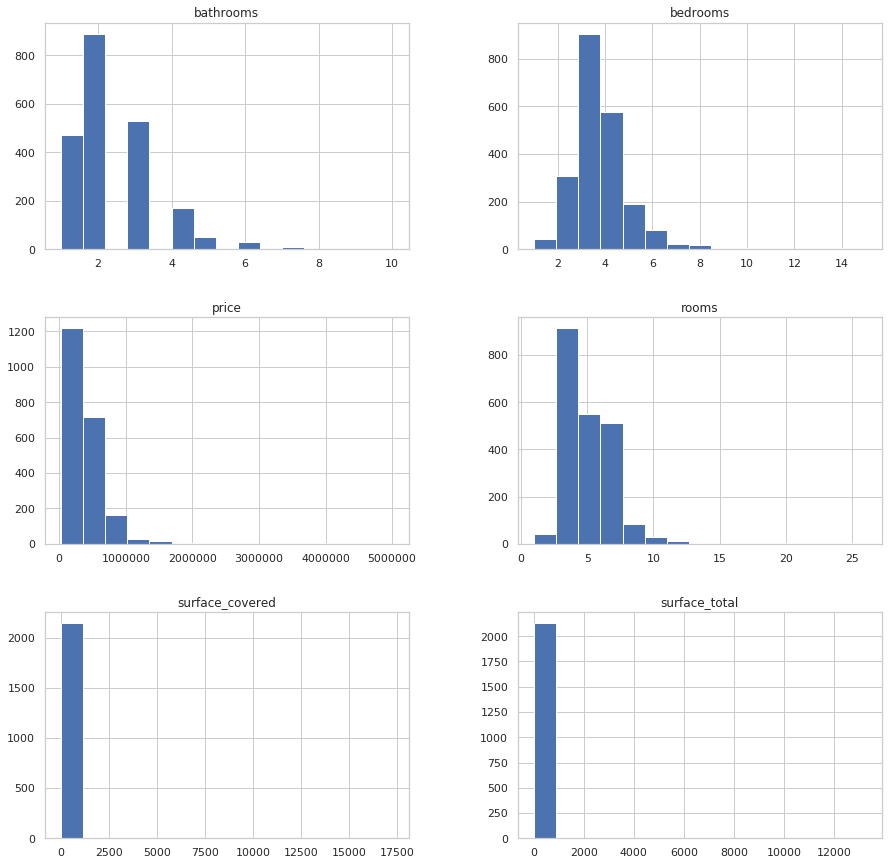

In [48]:
# Histogramas
df_casa.hist(bins=15,figsize=(15,15));

In [49]:
# Datos estadísticos
df_casa.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2.158000e+03
mean,5.026877,3.523633,2.349861,278.830862,221.286376,4.055938e+05
std,1.889438,1.377058,1.147624,357.680011,407.138248,2.991649e+05
min,1.000000,1.000000,1.000000,25.000000,25.000000,3.000000e+04
25%,4.000000,3.000000,2.000000,165.000000,128.250000,2.430000e+05
50%,5.000000,3.000000,2.000000,230.000000,179.000000,3.400000e+05
75%,6.000000,4.000000,3.000000,330.000000,260.000000,4.850000e+05
max,26.000000,15.000000,10.000000,13250.000000,17220.000000,5.000000e+06


### surface_total (Casa)

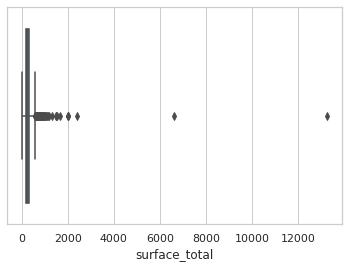

In [50]:
surface = sns.boxplot(x=df_casa["surface_total"])

Consideremos los valores de superficie mayores a 15 y menores a 1000

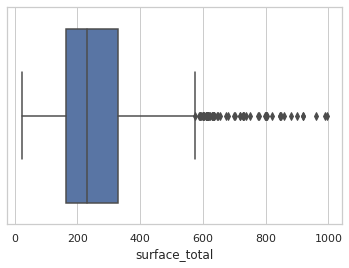

In [51]:
surface = sns.boxplot(df_casa[(df_casa["surface_total"] > 15) & (df_casa["surface_total"] < 1000)].surface_total)

### `surface_covered` vs `surface_total` (Casa)
Las propiedades no pueden tener surface_covered mayor a surface_total

In [52]:
df_casa[df_casa["surface_covered"] > df_casa["surface_total"]]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
446,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
1964,5.0,4.0,3.0,200.0,280.0,595000.0,Casa
3712,16.0,8.0,4.0,443.0,467.0,760000.0,Casa
3921,6.0,4.0,3.0,236.0,325.0,975000.0,Casa
4224,6.0,5.0,4.0,150.0,270.0,260000.0,Casa
...,...,...,...,...,...,...,...
132796,3.0,1.0,1.0,56.0,120.0,99500.0,Casa
135116,7.0,4.0,4.0,320.0,350.0,420000.0,Casa
139236,4.0,2.0,2.0,55.0,72.0,175000.0,Casa
145376,6.0,4.0,2.0,197.0,290.0,329900.0,Casa


Existen `183` instancias donde la superficie cubierta es mayor a la superficie total. Hay que remover dichas instancias.

### Precio

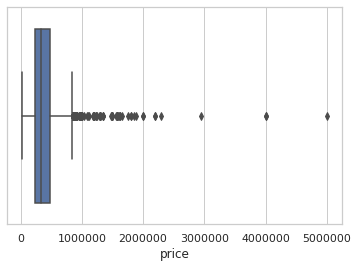

In [53]:
precio_casa_boxplot = sns.boxplot(df_casa["price"])

Consideremos las instancias con precios igual o menor a 4000000

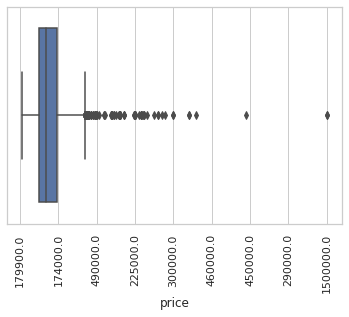

In [54]:
precio_casa_boxplot = sns.boxplot(df_casa[df_casa["price"] <= 4000000].price)
precio_casa_boxplot.set_xticklabels(labels=df_casa[df_casa["price"] <= 4000000].price, rotation=90);

### Filtrado del Dataset

In [55]:
# Se consideran aquellas instancias con superficie total entre 15 y 1000 metros cuadrados
df_casa = df_casa[(df_casa["surface_total"] >= 15) & (df_casa["surface_total"] <= 1000)]
df_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
336,3.0,1.0,2.0,116.0,116.0,290000.0,Casa
384,3.0,2.0,1.0,171.0,120.0,179900.0,Casa
385,3.0,2.0,1.0,71.0,68.0,174000.0,Casa
446,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
454,6.0,5.0,1.0,210.0,189.0,225000.0,Casa
...,...,...,...,...,...,...,...
145547,5.0,3.0,3.0,190.0,155.0,259500.0,Casa
145548,4.0,3.0,3.0,138.0,100.0,310000.0,Casa
145556,3.0,3.0,2.0,160.0,86.0,220000.0,Casa
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa


In [56]:
# Se descartan aquellas instancias con una superficie total menor a la superficie cubierta
df_casa = df_casa[df_casa["surface_total"] >= df_casa["surface_covered"]]
df_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
336,3.0,1.0,2.0,116.0,116.0,290000.0,Casa
384,3.0,2.0,1.0,171.0,120.0,179900.0,Casa
385,3.0,2.0,1.0,71.0,68.0,174000.0,Casa
454,6.0,5.0,1.0,210.0,189.0,225000.0,Casa
625,2.0,1.0,1.0,151.0,108.0,300000.0,Casa
...,...,...,...,...,...,...,...
145547,5.0,3.0,3.0,190.0,155.0,259500.0,Casa
145548,4.0,3.0,3.0,138.0,100.0,310000.0,Casa
145556,3.0,3.0,2.0,160.0,86.0,220000.0,Casa
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa


In [57]:
# Se consideran las casas con precio menor o igual a 4000000 dólares.
df_casa = df_casa[df_casa["price"] <= 4000000]
df_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
336,3.0,1.0,2.0,116.0,116.0,290000.0,Casa
384,3.0,2.0,1.0,171.0,120.0,179900.0,Casa
385,3.0,2.0,1.0,71.0,68.0,174000.0,Casa
454,6.0,5.0,1.0,210.0,189.0,225000.0,Casa
625,2.0,1.0,1.0,151.0,108.0,300000.0,Casa
...,...,...,...,...,...,...,...
145547,5.0,3.0,3.0,190.0,155.0,259500.0,Casa
145548,4.0,3.0,3.0,138.0,100.0,310000.0,Casa
145556,3.0,3.0,2.0,160.0,86.0,220000.0,Casa
145557,4.0,3.0,2.0,205.0,125.0,175000.0,Casa


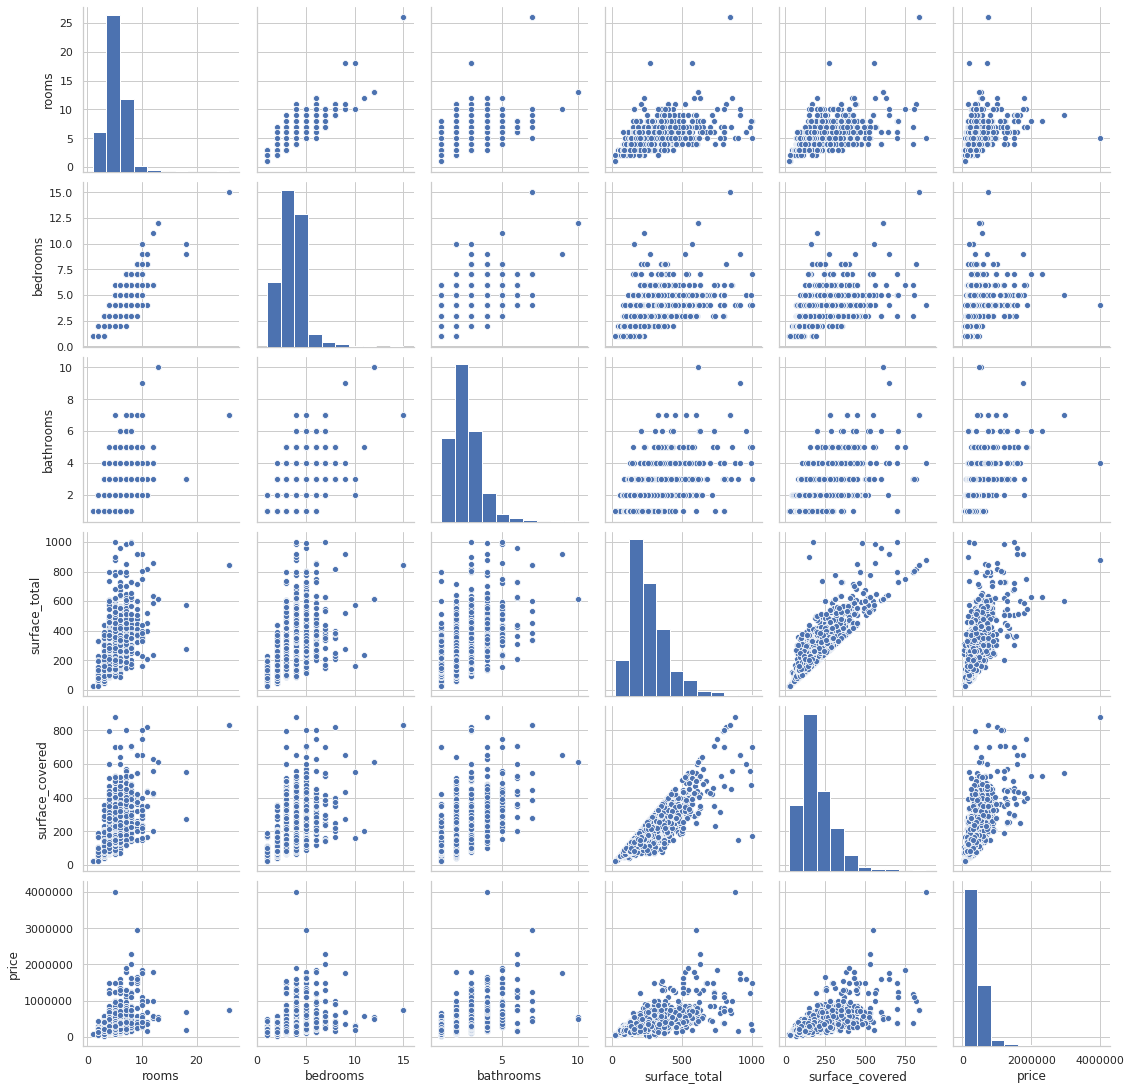

In [58]:
g = sns.pairplot(df_casa)

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

#### Departamentos

In [59]:
df_dep.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.920650,0.608427,0.733707,0.763470,0.520611
bedrooms,0.920650,1.000000,0.616564,0.694600,0.724098,0.484042
bathrooms,0.608427,0.616564,1.000000,0.707432,0.723940,0.658875
surface_total,0.733707,0.694600,0.707432,1.000000,0.948887,0.807863
surface_covered,0.763470,0.724098,0.723940,0.948887,1.000000,0.830133
price,0.520611,0.484042,0.658875,0.807863,0.830133,1.000000


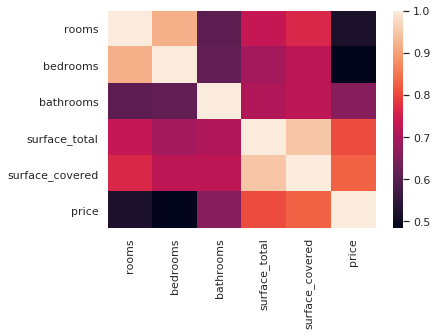

In [60]:
corr_dep = df_dep.corr()
sns.heatmap(corr_dep, 
            xticklabels=corr_dep.columns.values,
            yticklabels=corr_dep.columns.values)

En el caso de los departamentos, podemos apreciar que las variables que más influyen en el precio son las relacionadas a la superficie.

#### PH's

In [61]:
df_ph.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.928101,0.574380,0.638805,0.702318,0.583598
bedrooms,0.928101,1.000000,0.568264,0.623899,0.691070,0.570752
bathrooms,0.574380,0.568264,1.000000,0.528744,0.596010,0.578795
surface_total,0.638805,0.623899,0.528744,1.000000,0.867307,0.705516
surface_covered,0.702318,0.691070,0.596010,0.867307,1.000000,0.753536
price,0.583598,0.570752,0.578795,0.705516,0.753536,1.000000


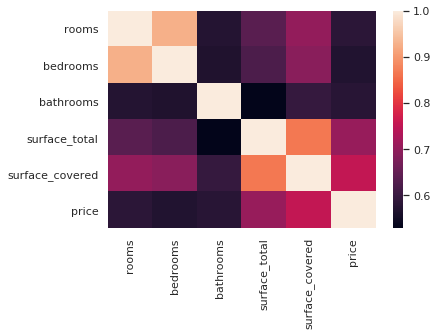

In [62]:
corr_ph = df_ph.corr()
sns.heatmap(corr_ph, 
            xticklabels=corr_ph.columns.values,
            yticklabels=corr_ph.columns.values)

Nuevamente podemos apreciar que las variables que más influyen en el precio son las relacionadas a la superficie. Sin embargo, en esta oportunidad tienen menos influencia en comparación a los departamentos.
 
#### Casas

In [63]:
df_casa.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.853623,0.533374,0.513201,0.589161,0.409799
bedrooms,0.853623,1.000000,0.563883,0.485633,0.561319,0.352082
bathrooms,0.533374,0.563883,1.000000,0.534902,0.601907,0.544150
surface_total,0.513201,0.485633,0.534902,1.000000,0.869687,0.631197
surface_covered,0.589161,0.561319,0.601907,0.869687,1.000000,0.666020
price,0.409799,0.352082,0.544150,0.631197,0.666020,1.000000


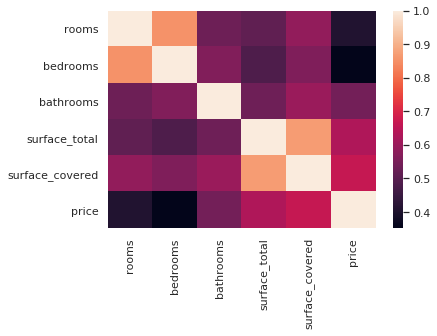

In [64]:
corr_casa = df_casa.corr()
sns.heatmap(corr_casa, 
            xticklabels=corr_casa.columns.values,
            yticklabels=corr_casa.columns.values)

Nuevamente podemos apreciar que las variables que más influyen en el precio son las relacionadas a la superficie. Sin embargo, en esta oportunidad tienen aún menos influencia en comparación a los departamentos.

### 2.1 Desafío

¿Cuál es el barrio con mayor cantidad de propiedades a la venta?

In [65]:
df["l3"].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

De acuerdo al dataset el barrio con mayor cantidad de propiedades a la venta es Palermo con 13073. Sin embargo, esto no significa que absolutamente todas las propiedades en venta estén registradas en el dataset, por lo que facilmente puede suceder que existan mayores cantidades de propiedades a la venta para el resto de barrios.

Un catastro exhaustivo podría resolver esta pregunta eficientemente.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

### **Preparar el dataset**

In [66]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [67]:
# Se ocuparán las propiedades que estén en la Capital Federal y que además sean Departamentos, PH's o Casas
data = df[(df["l2"] == "Capital Federal") & ((df["property_type"] == "Departamento") | (df["property_type"] == "PH") | (df["property_type"] == "Casa"))]
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [68]:
# Se desechan las columnas que no aportan información relevante 
data = data.drop(["start_date","end_date","created_on","lat",
                   "lon","l1","l2","l3","currency","title",
                   "description","operation_type"], axis=1)

In [69]:
# Se consideran las propiedades con superficie total menor a 1000 m2 y mayor a 15 m2.
data = data[(data["surface_total"] >= 15) & (data["surface_total"] <= 1000)]
data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [70]:
# Se consideran las propiedades con precio menor a 4000000 dólares.
data = data[data["price"] <= 4000000]
data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [71]:
data = data.dropna()
data.shape

(81019, 7)

In [72]:
data["property_type"].value_counts()

Departamento    69313
PH               9564
Casa             2142
Name: property_type, dtype: int64

In [73]:
# Tal como dice el enunciado, se trabajará con las instancias correspondientes a Departamentos
data = data[data["property_type"] == "Departamento"]
data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [74]:
data = data.drop("property_type", axis=1)
data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
11,2.0,1.0,1.0,68.0,59.0,149000.0
12,2.0,1.0,1.0,50.0,44.0,115000.0
20,2.0,1.0,1.0,31.0,31.0,75000.0
21,1.0,1.0,1.0,22.0,22.0,48000.0
...,...,...,...,...,...,...
146551,4.0,3.0,2.0,103.0,98.0,660000.0
146552,4.0,2.0,3.0,159.0,98.0,539000.0
146553,4.0,3.0,2.0,106.0,100.0,620000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


Este es un problema de regresión, por lo que las métricas deben ser acordes. Algunas métricas son:
1. Mean absolute error (MAE)
2. Mean squared error (MSE)
3. R² 

Por defecto se utiliza R², donde es mejor resultado posible es 1.0 y, además, puede tomar valores negativos cuando el modelo es muy malo. Utilizaremos esta métrica

In [75]:
import numpy as np

# X & y
X = data.drop("price", axis=1)
y = data["price"]

# Separar entre entrenamiento y test
np.random.seed(1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((55450, 5), (13863, 5), (55450,), (13863,))

### Random Forest Regressor

In [77]:
# Importar modelo 
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor()

In [78]:
# Entrenar el modelo
model_random_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
# Evaluar el modelo con el conjunto de test
model_random_forest.score(x_test,y_test)

0.876375566601337

In [80]:
# Evaluar el modelo con el conjunto de entrenamiento
y_preds_train = model_random_forest.predict(x_train)
model_random_forest.score(x_train, y_preds_train)

1.0

### Gráficos

In [81]:
y_preds_random_forest = model_random_forest.predict(x_test)
y_preds_random_forest

array([166119.8015873 , 427925.66666667, 257370.57687578, ...,
       684289.44      , 111757.65599124,  75190.14607706])

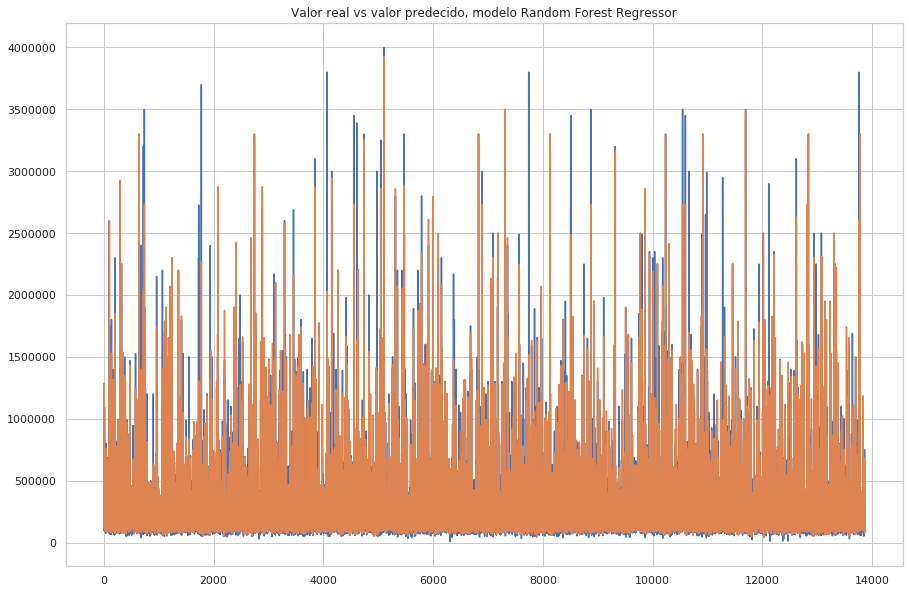

In [82]:
a = np.arange(len(y_test))
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(a,y_test)
ax.plot(a,y_preds_random_forest)
ax.set(title="Valor real vs valor predecido, modelo Random Forest Regressor");

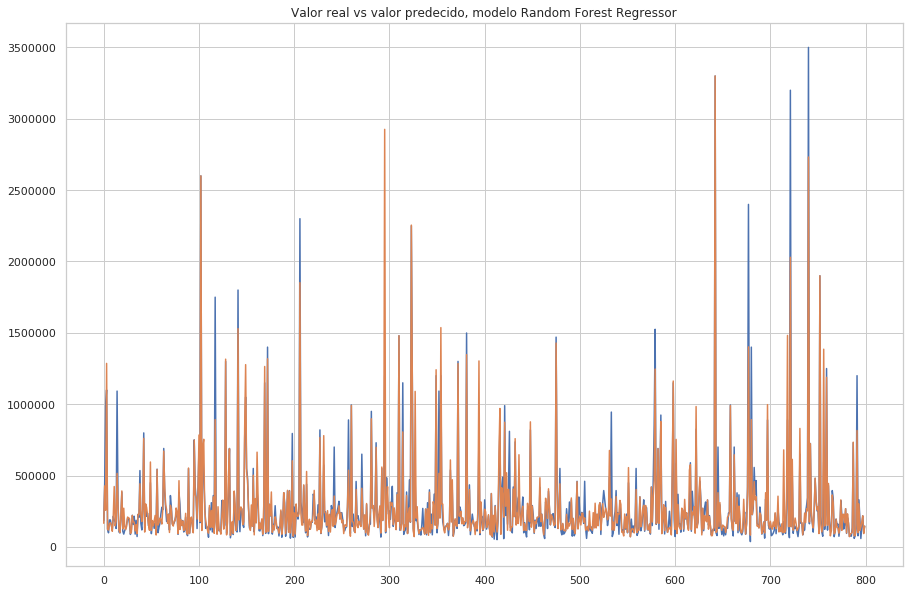

In [83]:
# Acotar los valores para una mejor vosualización
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(a[:800],y_test[:800])
ax.plot(a[:800],y_preds_random_forest[:800])
ax.set(title="Valor real vs valor predecido, modelo Random Forest Regressor");

### KNeighbors Regressor

In [84]:
# Importar el modelo
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()

In [85]:
# Entrenar el modelo
model_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [86]:
# Evaluar el modelo con el conjunto de test
model_knn.score(x_test,y_test)

0.8109372947079933

In [87]:
# Evaluar el modelo con el conjunto de entrenamiento
y_preds_train_knn = model_knn.predict(x_train)
model_knn.score(x_train, y_preds_train_knn)

1.0

### Gráficos

In [88]:
y_preds_knn = model_knn.predict(x_test)
y_preds_knn

array([177600., 459800., 433000., ..., 615840.,  97798.,  83800.])

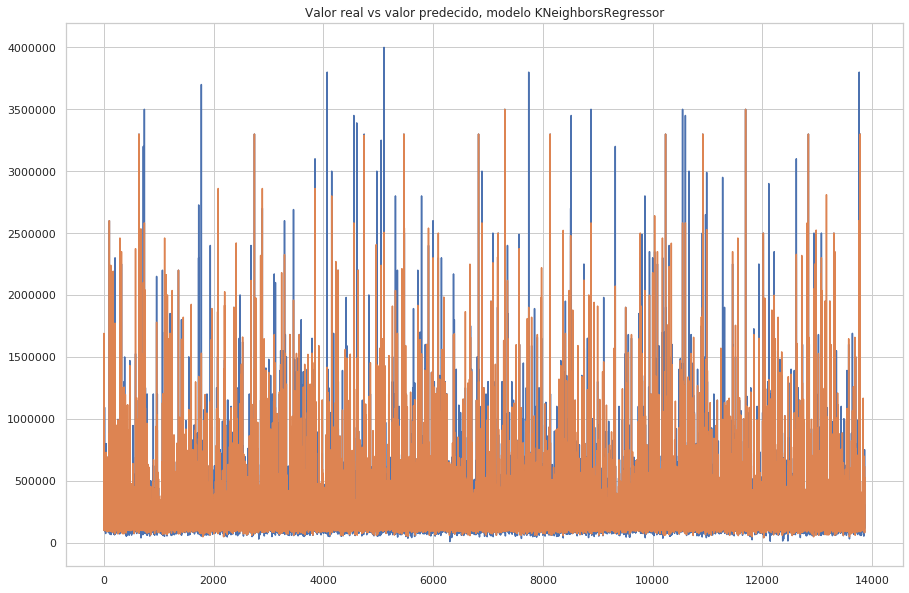

In [89]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(a,y_test)
ax.plot(a,y_preds_knn)
ax.set(title="Valor real vs valor predecido, modelo KNeighborsRegressor");

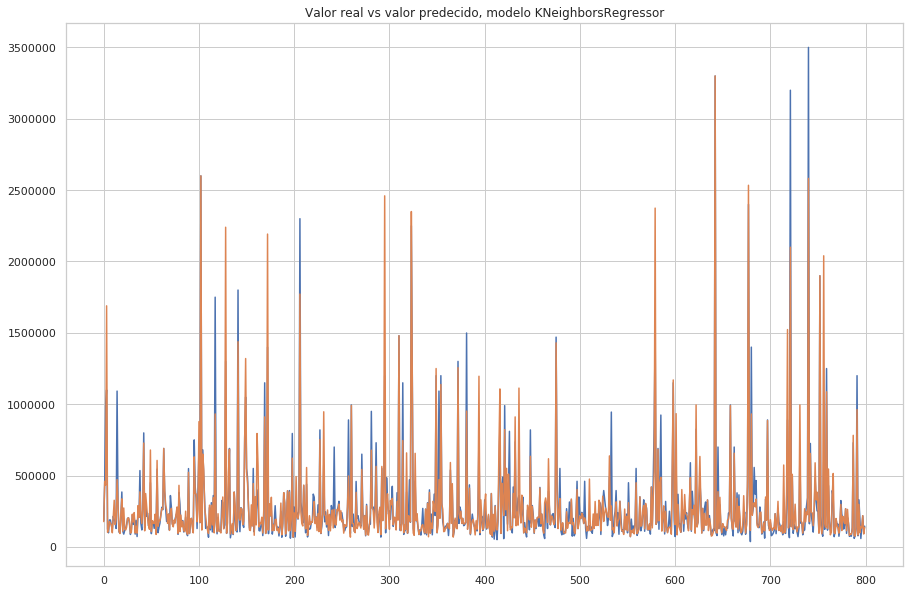

In [90]:
# Acotar los valores para una mejor vosualización
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(a[:800],y_test[:800])
ax.plot(a[:800],y_preds_knn[:800])
ax.set(title="Valor real vs valor predecido, modelo KNeighborsRegressor");

## Variación de parámetros para mejorar el desempeño de los modelos

* Para Random Forest Regressor se modificará la máxima profundidad el árbol (por defecto, `None`).
* Para KNeighbors Regressorr se modificará el número de vecinos (por defecto, `5`)


In [91]:
# Optimización de Random Forest Regressor
parametros_rfr = [None,5,10,20,30]

for param in parametros_rfr:
    model = RandomForestRegressor(max_depth=param)
    model.fit(x_train,y_train)
    print("Score con {} de profundidad: {}".format(param, model.score(x_test,y_test)))

Score con None de profundidad: 0.8755744075884675
Score con 5 de profundidad: 0.7863357649507062
Score con 10 de profundidad: 0.8545503379819296
Score con 20 de profundidad: 0.8778042932101745
Score con 30 de profundidad: 0.8754458309325632


Podemos apreciar que al modificar la profundidad del árbol el score no varía mucho. El mejor resultado se observa con `max_depth = 20`.

In [93]:
# Optimización de KNeighbors Regressor
parametros_knn = [1,3,5,7,9]

for param in parametros_knn:
    model = KNeighborsRegressor(n_neighbors=param)
    model.fit(x_train,y_train)
    print("Score con {} vecino(s): {}".format(param, model.score(x_test,y_test)))

Score con 1 vecino(s): 0.8000839327633218
Score con 3 vecino(s): 0.8113096518230553
Score con 5 vecino(s): 0.8109372947079933
Score con 7 vecino(s): 0.8098966494316888
Score con 9 vecino(s): 0.8072240588784773


### Optimización utilizando GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

params_rfr = {'max_depth':[None,5,10,20,30]}

model_rfr = RandomForestRegressor()

gs_rfr = GridSearchCV(model_rfr, params_rfr, verbose=2)

gs_rfr.fit(x_train,y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_depth=None ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... max_depth=None, total=   3.4s
[CV] max_depth=None ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ................................... max_depth=None, total=   3.3s
[CV] max_depth=None ..................................................
[CV] ................................... max_depth=None, total=   3.3s
[CV] max_depth=None ..................................................
[CV] ................................... max_depth=None, total=   3.3s
[CV] max_depth=None ..................................................
[CV] ................................... max_depth=None, total=   3.3s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   1.3s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   1.3s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   1.3s
[CV] max_depth=5 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [95]:
gs_rfr.best_params_

{'max_depth': None}

In [96]:
gs_rfr.cv_results_

{'mean_fit_time': array([3.15204096, 1.28993511, 2.11979222, 3.07223229, 3.19178171]),
 'std_fit_time': array([0.03487957, 0.00415466, 0.00482648, 0.00374436, 0.1028141 ]),
 'mean_score_time': array([0.15990548, 0.03136849, 0.0724422 , 0.15488715, 0.16027064]),
 'std_score_time': array([0.00163588, 0.00041187, 0.00019191, 0.00040734, 0.00259489]),
 'param_max_depth': masked_array(data=[None, 5, 10, 20, 30],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': 20},
  {'max_depth': 30}],
 'split0_test_score': array([0.88446577, 0.78282809, 0.8567761 , 0.88769133, 0.8843816 ]),
 'split1_test_score': array([0.88154158, 0.78425412, 0.85830648, 0.87967058, 0.87943019]),
 'split2_test_score': array([0.8813288 , 0.79244507, 0.85758718, 0.87734629, 0.87799801]),
 'split3_test_score': array([0.87659666, 0.78600216, 0.85607298, 0.87370231, 0.87723737]),


In [97]:
gs_rfr.score(x_test,y_test)

0.8755583232494304

In [98]:
params_knn = {'n_neighbors':[1,3,5,7,9]}

model_knn = KNeighborsRegressor()

gs_knn = GridSearchCV(model_knn, params_knn, verbose=2)

gs_knn.fit(x_train,y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.8s finished


In [99]:
gs_knn.best_params_

{'n_neighbors': 3}

In [100]:
gs_knn.score(x_test,y_test)

0.8113096518230553

Al utilizar GridSearchCV para optimizar los parametros no se logran mejoras evidentes en el desempeño de los modelos.

Para resolver el problema de la mejor manejra es necesario ocupar el modelo de árboles de decisión, pues con dicho modelo se alcanzó el mejor score (0.877).

Este score se podría mejorar utilizando información que incida de mejor manera en el precio, como por ejemplo el estado de deterioro del departamento, o el tipo de piso instalado. Además, es suficiente con considerar la superficie total del departamento, pues el dato de superficie cubierta no aporta mayor información en este caso particular (al tratarse de un departamento ambas variables deberían ser iguales).